In [1]:
import threading
import math
from queue import Queue
import numpy as np
import matplotlib.pyplot as plt
import pyaudio as pa
import wave
from scipy import signal, fftpack
from audioIO import decodePCM, load
from visual import fft_bar_data, plotSpect, plotWav

%matplotlib notebook

In [9]:
def consum(out_q, bar_no_idx):
    bar_size = [10, 50, 100, 200, 250]
    bar_number = bar_size[bar_no_idx]

    freq_idx = np.r_[:bar_number]                                    
    freq_magn = np.zeros(bar_number)
    
    fig,ax = plt.subplots(figsize=(8,8))
    ax.set_autoscaley_on(False)
    ax.set_ylim([0, 20])
    while 1:
        raw_data = out_q.get(timeout = 0.3)
        
        data_bar = fft_bar_data(decodePCM(raw_data), bar_number)
        data_bar = data_bar
        ax.cla()
        ax.bar(freq_idx, data_bar, width=0.3)

        fig.canvas.draw()
        fig.canvas.flush_events()
        
def produce(in_q, filename):
    CHUNK = 1024
    wf = wave.open(filename, 'rb')
    p = pa.PyAudio()
    stream = p.open(format=p.get_format_from_width(wf.getsampwidth()),
                    channels=wf.getnchannels(),
                    rate=wf.getframerate(),
                    output=True) 

    data = wf.readframes(CHUNK)

    while data != b'':
        stream.write(data)
        data = wf.readframes(CHUNK)
        in_q.put(data)
        
    stream.stop_stream()
    stream.close()

    p.terminate()
    
def realTime(filename):
    q = Queue()
    
    t1 = threading.Thread(target=produce, args=(q, filename)) 
    t2 = threading.Thread(target=consum, args=(q, 0)) 
        
    t1.start()
    t2.start()
    
    t1.join()
    t2.join()

/Users/zhouhang/anaconda3/envs/deploy/lib/python3.5/site-packages/scipy/fftpack/basic.py:153: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  x = x[index]


plotting the real-time spectrum


/Users/zhouhang/anaconda3/envs/deploy/lib/python3.5/site-packages/scipy/fftpack/basic.py:153: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  x = x[index]
/Users/zhouhang/anaconda3/envs/deploy/lib/python3.5/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x
Exception in thread Thread-15:
Traceback (most recent call last):
  File "/Users/zhouhang/anaconda3/envs/deploy/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/Users/zhouhang/anaconda3/envs/deploy/lib/py

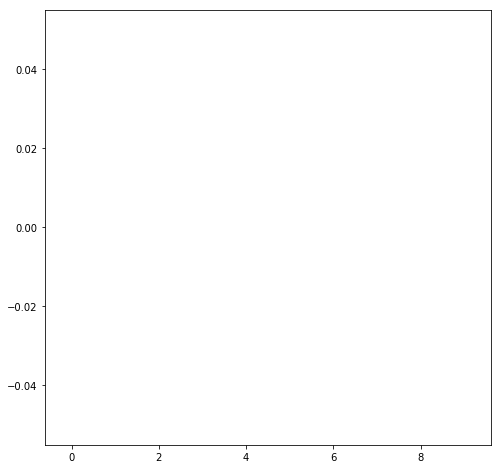

In [12]:
print("plotting the real-time spectrum")
demo_file = "../data/demo_chunks/real_time_demo.wav"
realTime(demo_file)